<a href="https://colab.research.google.com/github/logicalbhanu/Interview_assignments/blob/main/nextlab_assignment_quesiton_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regex i.e. Question 1.1

In [1]:
data = '''{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"i
d":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable'''

In [2]:
print(data)

{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"i
d":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable


In [3]:
import re
pattern = '\d+[\},]'  
result = re.findall(pattern, data)
for i in result:
    print(i[:-1], end=', ')

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 648, 649, 650, 651, 652, 653, 3, 

### Finding Faulty Reviews i.e. question 1.2

In [4]:
!pip install gdown


In [5]:
!gdown 1SuiFw4MYxOBlqsRgyXLfch28-gzx8bX6

Downloading...
From: https://drive.google.com/uc?id=1SuiFw4MYxOBlqsRgyXLfch28-gzx8bX6
To: /content/chrome_reviews.csv
100% 1.98M/1.98M [00:00<00:00, 125MB/s]


In [6]:
import pandas as pd
df = pd.read_csv('chrome_reviews.csv')

In [7]:
df.columns

Index(['ID', 'Review URL', 'Text', 'Star', 'Thumbs Up', 'User Name',
       'Developer Reply', 'Version', 'Review Date', 'App ID'],
      dtype='object')

In [8]:
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [9]:
df['Star'].isna().sum(), df['Text'].isna().sum()

(0, 1)

In [10]:
df = df[df['Text'].notnull()]

In [11]:
df['Star'].isna().sum(), df['Text'].isna().sum()

(0, 0)

In [12]:
df['Star'].value_counts()

5    3870
1    1894
4     652
3     451
2     336
Name: Star, dtype: int64

In [14]:
!pip install happytransformer

     |████████████████████████████████| 45 kB 1.8 MB/s 
     |████████████████████████████████| 1.2 MB 9.9 MB/s 
     |████████████████████████████████| 4.2 MB 30.4 MB/s 
     |████████████████████████████████| 342 kB 41.3 MB/s 
     |████████████████████████████████| 212 kB 52.1 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 49.3 MB/s 
     |████████████████████████████████| 136 kB 67.4 MB/s 
     |████████████████████████████████| 127 kB 50.2 MB/s 
     |████████████████████████████████| 6.6 MB 44.1 MB/s 
     |████████████████████████████████| 596 kB 59.9 MB/s 
     |████████████████████████████████| 271 kB 57.0 MB/s 
     |████████████████████████████████| 144 kB 57.7 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    F

In [15]:
from happytransformer import HappyTextClassification

In [16]:
classifier = HappyTextClassification(model_type="DISTILBERT", model_name="distilbert-base-uncased-finetuned-sst-2-english", num_labels=2)

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

05/17/2022 05:49:10 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [17]:
df['Text'].values

array(['This is very helpfull aap.', 'Good',
       'Not able to update. Neither able to uninstall.', ...,
       "One thing that I have to say I can't spelled to good but I don't have any problem try to spell to my best",
       'Excellent',
       'After update it lag and always slow same goes to googleee ;)))))) !!!! I want to do my work but 🌚'],
      dtype=object)

In [18]:
results = []
for i in df['Text'].values:
    results.append(classifier.classify_text(i))
    

In [19]:
results = [1 if res.label=='POSITIVE' else 0 for res in results]

In [20]:
results[:10]

[1, 1, 0, 1, 0, 1, 1, 1, 0, 0]

In [21]:
df['sentiment'] = results

**Considering reviews less than 2.5 as negative reviews**

###Final Faulty Reviews

In [23]:
df[(df['sentiment']==1) & (df['Star']<2.5)][['Text', 'Star']]

,Text,Star
15,Very coming in real status. Thank you,1
42,Okk kind but bad then brave,1
84,App updated issue,1
91,Jelek..........?!!!!!!!!!!!!!!!!!,1
101,Good,1
...,...,...
7051,Helpfull,1
7076,Second,2
7101,Wirst,1
7113,Idk,1


## Finding correlation between attributes i.e. quesiton 1.3

In [ ]:
!gdown 1yuDyU7EjJ8Nai83FDdIF2w4inm17NzBF

In [ ]:
df_ranking = pd.read_csv('browser_rankings_data.csv', header=1)

**Some Preprocessing**

In [ ]:
df_ranking.describe()

,ID,Rank
count,3066.000000,3050.000000
mean,57109.156230,15.155738
std,39290.651658,24.268403
min,1.000000,1.000000
25%,22484.000000,2.000000
50%,52427.000000,5.000000
75%,90683.750000,16.000000
max,131576.000000,134.000000


In [ ]:
df_ranking.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [ ]:
df_ranking.columns

Index(['ID', 'Keyword', 'Rank', 'Country', 'Language', 'Date', 'App ID',
       'Date of Last Description Change', 'Short Description',
       'Long Description'],
      dtype='object')

In [ ]:
df_ranking.describe()

,ID,Rank
count,3066.000000,3050.000000
mean,57109.156230,15.155738
std,39290.651658,24.268403
min,1.000000,1.000000
25%,22484.000000,2.000000
50%,52427.000000,5.000000
75%,90683.750000,16.000000
max,131576.000000,134.000000


In [ ]:

df_ranking.Rank.quantile(0.95)

79.0

In [ ]:
df_ranking['Keyword'].value_counts()

browser                         608
android browser                 608
privacy browser                 370
privacy browsers for android    370
best privacy browsers           370
fast browser                    370
ad free browser                 370
Name: Keyword, dtype: int64

[]

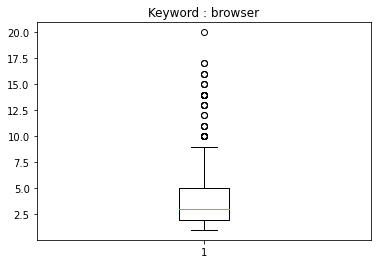

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(x=df_ranking[df_ranking['Keyword']=='browser']['Rank'])
plt.title('Keyword : browser')
plt.plot()

[]

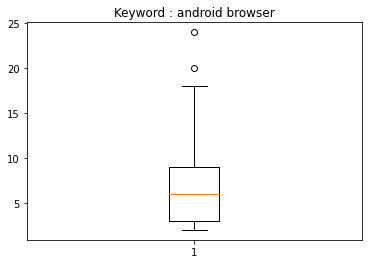

In [ ]:
plt.boxplot(x=df_ranking[df_ranking['Keyword']=='android browser']['Rank'])
plt.title('Keyword : android browser')
plt.plot()

In [ ]:
df_ranking['Keyword_codes'] = pd.factorize(df_ranking['Keyword'])[0]

In [ ]:
df_ranking['Keyword_codes'].value_counts()

0    608
1    608
2    370
3    370
4    370
5    370
6    370
Name: Keyword_codes, dtype: int64

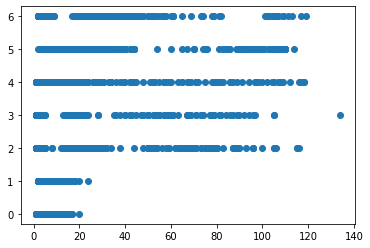

In [ ]:
plt.scatter(y=df_ranking['Keyword_codes'], x=df_ranking['Rank'])

In [ ]:
corr = df_ranking.corr()
print(corr)

                     ID      Rank  Keyword_codes
ID             1.000000  0.008355       0.004043
Rank           0.008355  1.000000       0.329200
Keyword_codes  0.004043  0.329200       1.000000


**Adding the length of short and long description as features**

In [ ]:
df_ranking['short_des_len']=df_ranking['Short Description'].apply(len)

In [ ]:
df_ranking['short_des_len']

0       80
1       79
2       84
3       84
4       58
        ..
3061    84
3062    58
3063    58
3064    59
3065    59
Name: short_des_len, Length: 3066, dtype: int64

In [ ]:
df_ranking['long_des_len']=df_ranking['Long Description'].apply(len)

In [ ]:
df_ranking.columns

Index(['ID', 'Keyword', 'Rank', 'Country', 'Language', 'Date', 'App ID',
       'Date of Last Description Change', 'Short Description',
       'Long Description', 'Keyword_codes', 'short_des_len', 'long_des_len'],
      dtype='object')

In [ ]:
df_ranking.describe()

,ID,Rank,Keyword_codes,short_des_len,long_des_len
count,3066.000000,3050.000000,3066.000000,3066.000000,3066.000000
mean,57109.156230,15.155738,2.611872,72.825179,2407.330072
std,39290.651658,24.268403,2.058851,8.665137,934.209784
min,1.000000,1.000000,0.000000,58.000000,1283.000000
25%,22484.000000,2.000000,1.000000,69.000000,1440.000000
50%,52427.000000,5.000000,2.000000,75.000000,2771.000000
75%,90683.750000,16.000000,4.000000,80.000000,3229.000000
max,131576.000000,134.000000,6.000000,84.000000,3939.000000


In [ ]:
df_ranking.corr()

,ID,Rank,Keyword_codes,short_des_len,long_des_len
ID,1.000000,0.008355,0.004043,0.001208,0.001040
Rank,0.008355,1.000000,0.329200,0.208939,0.365600
Keyword_codes,0.004043,0.329200,1.000000,0.210166,0.181085
short_des_len,0.001208,0.208939,0.210166,1.000000,0.728093
long_des_len,0.001040,0.365600,0.181085,0.728093,1.000000


**setting a number which represent the position occurence of keyword in Short and Long Description**

In [ ]:
position = []
for ind,descrp in enumerate(df_ranking['Short Description'].values):
    pos = descrp.find(df_ranking['Keyword'].iloc[ind])
    position.append(pos)

print('positions original',position[:10])

max_short_len = max(df_ranking['Short Description'].apply(len))
print('max_short_len',max_short_len)

position = [max_short_len if length==-1 else length for length in position]
print('positions after change',position[:10])

df_ranking['Short_des_key_pos'] = position 

positions original [52, 40, 15, 15, -1, -1, -1, -1, -1, -1]
max_short_len 84
positions after change [52, 40, 15, 15, 84, 84, 84, 84, 84, 84]


In [ ]:
position = []
for ind,descrp in enumerate(df_ranking['Long Description'].values):
    pos = descrp.find(df_ranking['Keyword'].iloc[ind])
    position.append(pos)

print('positions original', position[:10])

max_long_len = max(df_ranking['Long Description'].apply(len))
print('max_long_len',max_long_len)

position = [max_long_len if length==-1 else length for length in position]
print('positions after change',position[:10])

df_ranking['Long_des_key_pos'] = position 

positions original [308, 53, 72, 26, 244, 286, 212, 212, -1, -1]
max_long_len 3939
positions after change [308, 53, 72, 26, 244, 286, 212, 212, 3939, 3939]


**Final Correlation stats**

In [ ]:
df_ranking.corr()

,ID,Rank,Keyword_codes,short_des_len,long_des_len,Short_des_key_pos,Long_des_key_pos
ID,1.000000,0.008355,0.004043,0.001208,0.001040,0.001882,0.002562
Rank,0.008355,1.000000,0.329200,0.208939,0.365600,0.130368,0.261694
Keyword_codes,0.004043,0.329200,1.000000,0.210166,0.181085,0.401324,0.598432
short_des_len,0.001208,0.208939,0.210166,1.000000,0.728093,-0.348606,0.054996
long_des_len,0.001040,0.365600,0.181085,0.728093,1.000000,-0.209832,0.053649
Short_des_key_pos,0.001882,0.130368,0.401324,-0.348606,-0.209832,1.000000,0.607237
Long_des_key_pos,0.002562,0.261694,0.598432,0.054996,0.053649,0.607237,1.000000


#### Final thoughts on Correlations between attributes

1. Rank is correlated with keyword and long_description at 30%
2. Keywords are correlated with long description with almost 60% and with short description at 40%
3. short and long descriptions lengths are highly correlated to each other
4. App is not all significantly correlated with any of the attributes.